# Pymaceuticals Inc.
---

### Analysis

- The purpose of this study was to compare Capomulin against other potential treatments with regards to treating squamous cell carcinoma in mice.

- Capomulin performed arguably as well as Ramicane based on median tumor volume. Both drugs performed significantly better than the rest of the field. 

- There is a positive correlation between tumor volume and weights. Additional analysis to determine dependancies is recommended. 

 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids=[]
list_i = 0
for x in range(len(merge_df['Mouse ID'])):
    check_id = merge_df['Mouse ID'][x]
    if x > 1:
        if (check_id == merge_df['Mouse ID'][x-1]) & (merge_df['Timepoint'][x] == merge_df['Timepoint'][x-1]) & (check_id not in duplicate_ids):
            duplicate_ids.append(merge_df['Mouse ID'][x])
        
duplicate_ids[0]

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == duplicate_ids[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != duplicate_ids[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_list = clean_df['Drug Regimen'].value_counts().index
mean_tv =[] 
med_tv = [] 
tvv = [] 
tvsd = [] 
tvse = []
for x in range(len(drug_list)):
    temp_df = clean_df.loc[clean_df['Drug Regimen']==drug_list[x],['Tumor Volume (mm3)']]
    mean_tv.append(temp_df.mean()[0])
    med_tv.append(temp_df.median()[0])
    tvv.append(temp_df.var()[0])
    tvsd.append(temp_df.std()[0])
    tvse.append(st.sem(temp_df)[0])

# Assemble the resulting series into a single summary DataFrame.
sum_df = pd.DataFrame({
    'Drug Regimen':drug_list,
    'Mean Tumor Volume':mean_tv,
    'Median Tumor Volume':med_tv,
    'Tumor Volume Variance':tvv,
    'Tumor Volume Std. Dev.':tvsd,
    'Tumor Volume Std. Err.':tvse
})
sum_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
2,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
3,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
4,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
7,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
8,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
9,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_2 = clean_df.groupby(clean_df['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

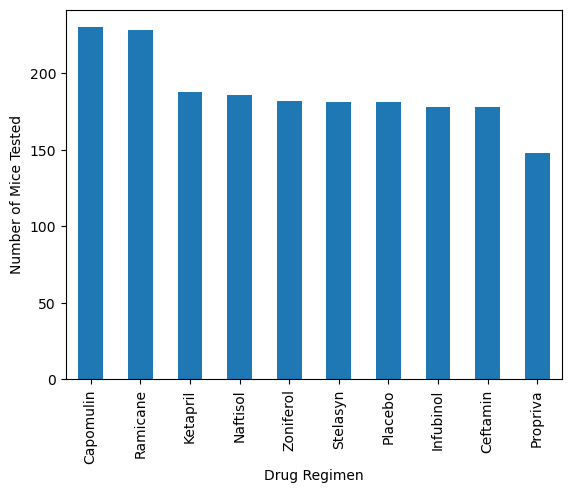

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
chart_data = clean_df['Drug Regimen'].value_counts()
chart_data.plot.bar()
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

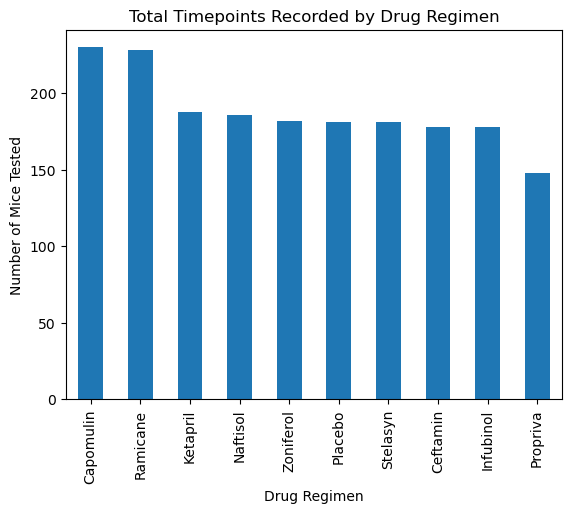

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_data = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Timepoint'].count())
bar_data = bar_data.sort_values(by='Timepoint', ascending=False)
bar_1 = bar_data.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested', title='Total Timepoints Recorded by Drug Regimen', legend=None)
plt.show()

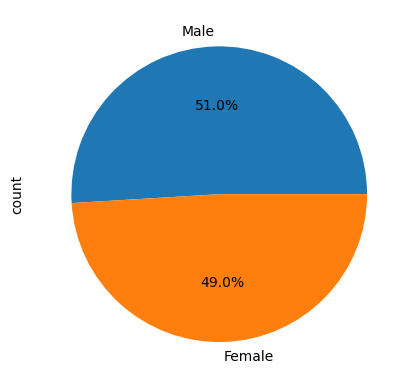

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
chart_data = clean_df['Sex'].value_counts()
chart_data.plot.pie(autopct='%1.1f%%')
plt.show()

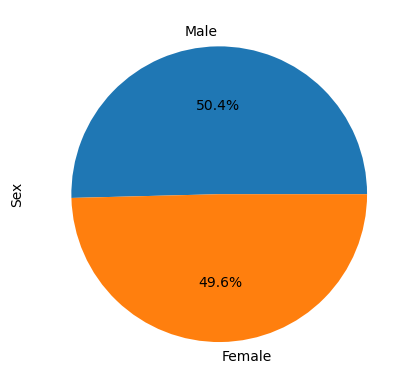

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sexes = clean_df.groupby('Sex')['Mouse ID'].nunique()
data = [sexes['Male'],sexes['Female']]
pie_2 = plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Use idxmax to ensure the correct tumor volume matches with the maximum timepoint
tumors = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') | (clean_df['Drug Regimen']=='Ramicane') | (clean_df['Drug Regimen']=='Infubinol') | (clean_df['Drug Regimen']=='Ceftamin')]
tumors = tumors.loc[tumors.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].idxmax()].reset_index()
tumors = tumors.drop(columns=['index'])
tumors.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


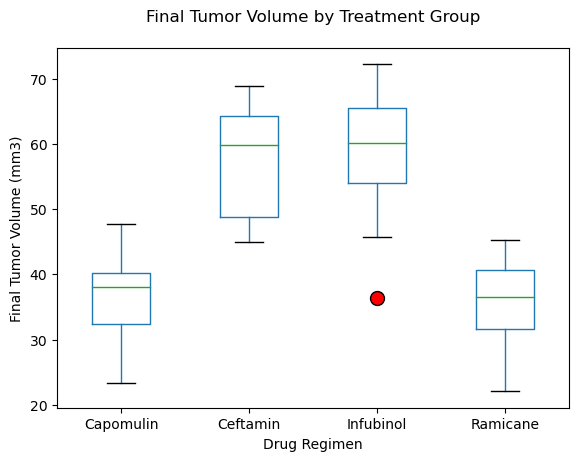

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
fig1 = tumors.boxplot(by='Drug Regimen',column='Tumor Volume (mm3)',grid=False,flierprops={'markersize':10,'markerfacecolor': 'red'})
fig1.get_figure().suptitle('Final Tumor Volume by Treatment Group')
fig1.set_title('')
fig1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

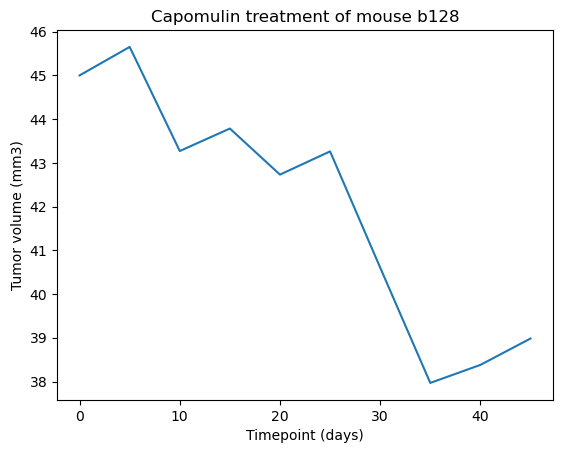

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseb128 = clean_df.loc[clean_df['Mouse ID']=='b128',['Timepoint','Tumor Volume (mm3)']]
fig2 = mouseb128.plot.line(x='Timepoint',y='Tumor Volume (mm3)',title='Capomulin treatment of mouse b128',xlabel='Timepoint (days)',ylabel='Tumor volume (mm3)',legend=None)

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capomulin = capomulin.groupby(['Mouse ID','Weight (g)']).mean().reset_index()
fig3 = capomulin.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',ylabel='Average Tumor Volume (mm3)',title='Average Tumor Volume by Mouse Weight for Capomulin Regimen')

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.53.


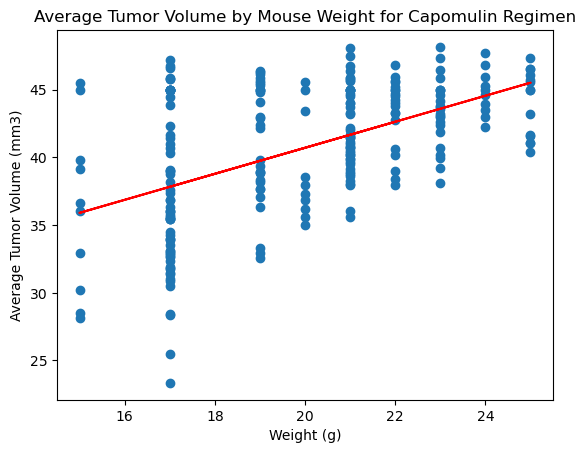

In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight for Capomulin Regimen')

# Following code is from class exercise on linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

plt.plot(x_values,regress_values,color='red')

print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(rvalue,2)}.')
plt.show()
